In [11]:
:dep plotly = { version = "=0.8.0" } # 0.8.1 has breaking changes
:dep itertools-num = "0.1.3"

In [12]:
extern crate plotly;
extern crate itertools_num;
extern crate itertools;

In [13]:
#![allow(warnings)]

use itertools_num::linspace;
use plotly::common::{
    ColorScale, ColorScalePalette, DashType, Fill, Font, Line, LineShape, Marker, Mode, Title,
};
use plotly::layout::{Axis, BarMode, Layout, Legend, TicksDirection};
use plotly::{Bar, Plot, Scatter};

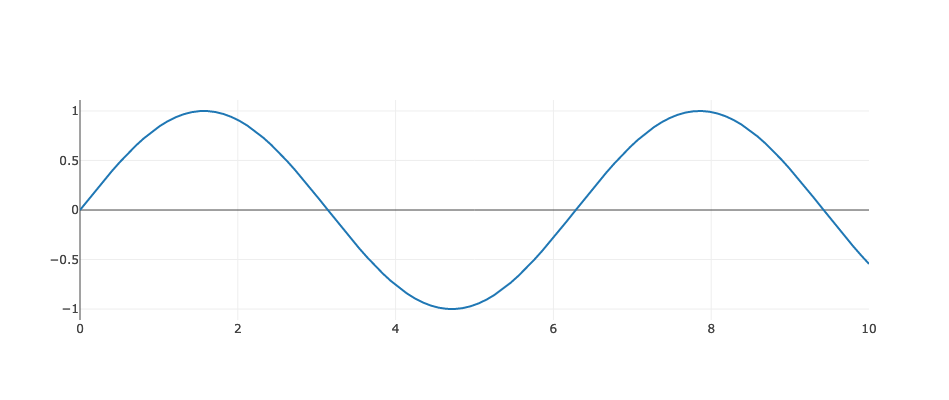

In [14]:
let n: usize = 100;
let xs: Vec<f64> = linspace(0., 10., n).collect();
let ys: Vec<f64> = xs.iter().map(|x| x.sin()).collect();

let trace = Scatter::new(xs, ys).mode(Mode::Lines);
let mut plot = Plot::new();
plot.add_trace(trace);
let layout = Layout::new().height(400);
plot.set_layout(layout);
plot.lab_display();

In [17]:
fn chirp(fs: f32, t: f32, f1: f32, f0: f32, k: f32) -> Vec<f32> {
    // constants
    use core::f32::consts::TAU;
    let tt = (t * fs) as usize;
    let pd0 = f0 / fs;
    
    // state
    let mut fc = f1;
    let mut p0 = 0.;
    let mut p1 = 0.;
    
    // generate signal 
    let mut signal = vec![0.0; tt];
    
    for (x, sample) in signal.iter_mut().enumerate() {
        let y = (TAU * (p0 + p1)).sin();
        *sample = y;
        
        // update curve 
        let c = 1.0 - ((x as f32).powf(k) / (tt as f32).powf(k));
        fc = c * f1;
        
        // update phase
        p0 += pd0;
        if p0 >= 1. {
            p0 -= 1.;
        }
        p1 += (fc / fs);
        if p1 >= 1. {
            p1 -= 1.;
        }
    }
    
    signal
}

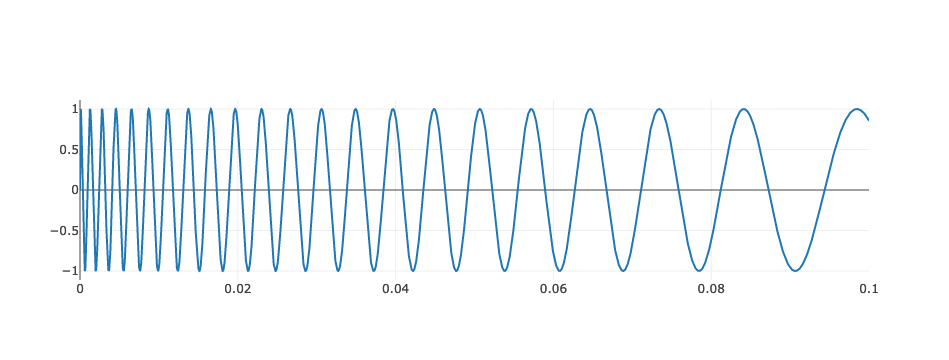

In [18]:
let fs = 48000.0;
let t = 0.1;
let k = 0.02;

let ys = chirp(fs, t, 8000., 55., k);

let xs: Vec<f32> = linspace(0., t, ys.len()).collect();
let trace = Scatter::new(xs, ys).mode(Mode::Lines);

let mut plot = Plot::new();
plot.add_trace(trace);
let layout = Layout::new().height(300);
plot.set_layout(layout);
plot.lab_display();
